In [2]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [3]:
def fnr(detections, threshold):
    n = len(detections)
    count = 0
    # print("Threshold: ", threshold)
    for x in detections:
        if x < threshold:
            count += 1

    return ((count / n) * 100)

def fpr(detections, threshold):
    n = len(detections)
    count = 0
    for x in detections:
        if x > threshold:
            count += 1
    
    return ((count / n) * 100)

In [4]:
def preprocess(detections):
  n = len(detections)
  threshold = np.mean(detections) + 3 * np.std(detections)
  print(f"Size = {n}, Max = {np.max(detections)}, Min = {np.min(detections)}, Mean = {np.mean(detections): 10.8f}, STD = {np.std(detections): 10.8f}, D = {np.mean(detections) + 3 * np.std(detections): 10.8f}")
  

  index = np.zeros(n)
  results = np.zeros(n)

  for i, result in enumerate(detections):
    index[i] = i + 1
    results[i] = result
  
  index /= n
  results *= 10000

  return index, results, threshold

In [5]:
def plot_cdf_adversarial_audio(original_detections, adversarial_detections, attack_name):
  original_index, original_results, threshold = preprocess(original_detections)
  plt.plot(original_results, original_index, "k--", label="Test Set")

  i = 0
  colors = ["red", "blue", "green", "black", "yellow", "lime", "pink", "gold", "olive", "skyblue", "thistle"]
  for x in adversarial_detections:
    temp_index, temp_results, _ = preprocess(adversarial_detections[x])
    plt.plot(temp_results, temp_index, colors[i], label=f"{x}")
    i = (i + 1) % len(colors)
    print("------------------------------------------")
    print(f"FNR for {x}:", fnr(adversarial_detections[x], threshold))
    print("------------------------------------------")

  # adversarial_index, adversarial_results = preprocess(adversarial_detections)

  # plt.plot(adversarial_results, adversarial_index, "r-", label=f"{attack_name}")

  plt.xlabel(r'Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$', fontsize=12)
  plt.ylabel('CDF', fontsize=12)
  plt.title(attack_name)
  plt.tick_params(axis='both', labelsize=12)
  plt.legend()
  plt.tight_layout()
  plt.savefig(f"./plots/{x}.png")
  plt.show()

  if not os.path.exists("./plots"):
    os.makedirs("./plots")
  
  




In [6]:
# Original Audios
original_files = os.listdir(os.path.join("output", "fakebob_repo"))

original_data = {}
combined_data = []
for x in original_files:
  with open(f"output/fakebob_repo/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    original_data[x.split(".pickle")[0]] = temp
    combined_data.extend(temp)

combined_data.sort()


Size = 5, Max = 0.00010179836681345478, Min = 2.4235528144345153e-06, Mean =  0.00004628, STD =  0.00003652, D =  0.00015584
Size = 100, Max = 5.5368607718264684e-05, Min = 0.0, Mean =  0.00001837, STD =  0.00001759, D =  0.00007114
Size = 500, Max = 0.00015418203838635236, Min = 0.0, Mean =  0.00004719, STD =  0.00003913, D =  0.00016457
Size = 605, Max = 0.00015418203838635236, Min = 0.0, Mean =  0.00004242, STD =  0.00003797, D =  0.00015633
FPR for test-set: 0.0


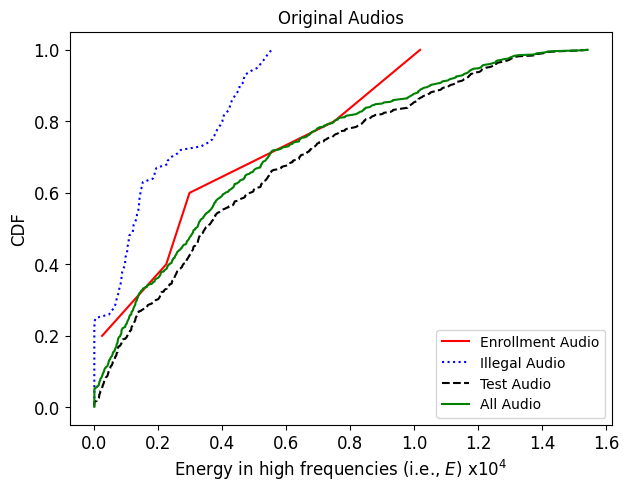

In [7]:
# Plot CDF of original data
enroll_index, enroll_results, enroll_threshold = preprocess(original_data['enrollment-set'])
impostor_index, impostor_results, impostor_threshold = preprocess(original_data['illegal-set'])
test_index, test_results, test_threshold = preprocess(original_data['test-set'])
all_index, all_results, all_threshold = preprocess(combined_data)

print("FPR for test-set:", fpr(original_data["test-set"], test_threshold))

plt.plot(enroll_results, enroll_index, "r-", label="Enrollment Audio")
plt.plot(impostor_results, impostor_index, "b:", label="Illegal Audio")
plt.plot(test_results, test_index, "k--", label="Test Audio")
plt.plot(all_results, all_index, "g", label="All Audio")

plt.xlabel(r"Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.tick_params(axis="both", labelsize=12)
plt.legend()
plt.tight_layout()
plt.title("Original Audios")
plt.savefig("plots/original_audios_fakebob.png")
plt.show()

Size = 500, Max = 0.00015418203838635236, Min = 0.0, Mean =  0.00004719, STD =  0.00003913, D =  0.00016457
Size = 465, Max = 0.009297085925936699, Min = 0.0016456766752526164, Mean =  0.00578406, STD =  0.00150653, D =  0.01030365
------------------------------------------
FNR for fakebob_0.002_0.0_50_1000_100: 0.0
------------------------------------------


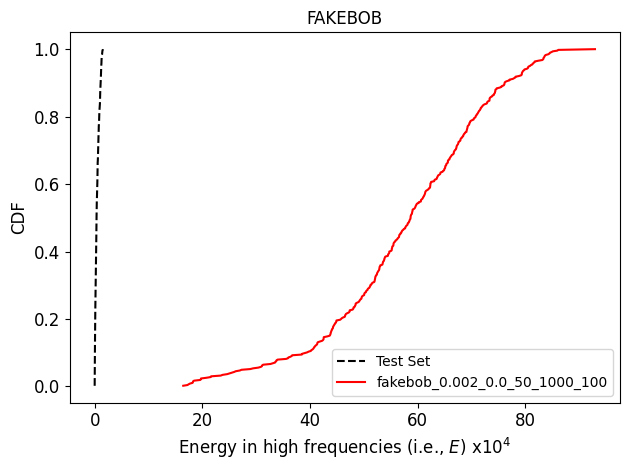

In [7]:
# FAKEBOB Attack
fakebob_files = os.listdir("output/fakebob_new/")
fakebob_data = {}
for x in fakebob_files:
  with open(f"output/fakebob_new/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    fakebob_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["test-set"], fakebob_data, "FAKEBOB")

###### Failed experiment

Size = 500, Max = 0.00015418203838635236, Min = 0.0, Mean =  0.00004719, STD =  0.00003913, D =  0.00016457
Size = 465, Max = 0.009552279487252235, Min = 0.0016430579125881195, Mean =  0.00582318, STD =  0.00152165, D =  0.01038813
------------------------------------------
FNR for experiments: 0.0
------------------------------------------


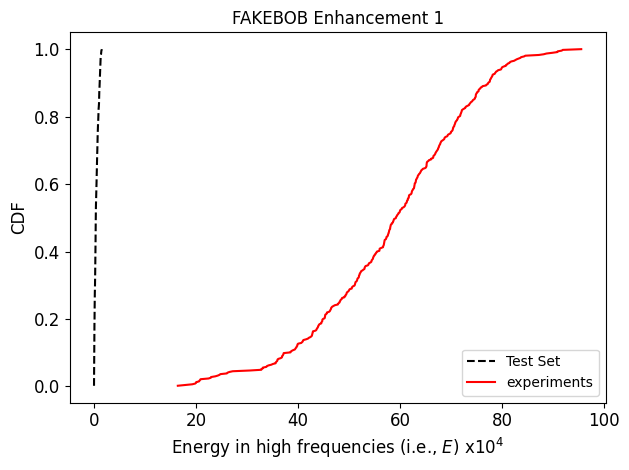

In [8]:
# Enhancement 1 (incorporating MEHFEST metric in the loss function)
experiment_1_files = os.listdir("output/experiment_1//")
experiment_1_data = {}
for x in experiment_1_files:
  with open(f"output/experiment_1/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    experiment_1_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["test-set"], experiment_1_data, "FAKEBOB Enhancement 1")

In [26]:
# Original Audios for 5142
original_files_5142 = os.listdir(os.path.join("output", "enhance_1_original"))

original_data_5142 = {}
for x in original_files_5142:
  with open(f"output/enhance_1_original/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    original_data_5142[x.split(".pickle")[0]] = temp

Size = 500, Max = 0.00015418203838635236, Min = 0.0, Mean =  0.00004719, STD =  0.00003913, D =  0.00016457
Size = 260, Max = 0.0037080668844282627, Min = 0.0, Mean =  0.00047826, STD =  0.00077236, D =  0.00279535
------------------------------------------
FNR for enhance_001: 53.84615384615385
------------------------------------------


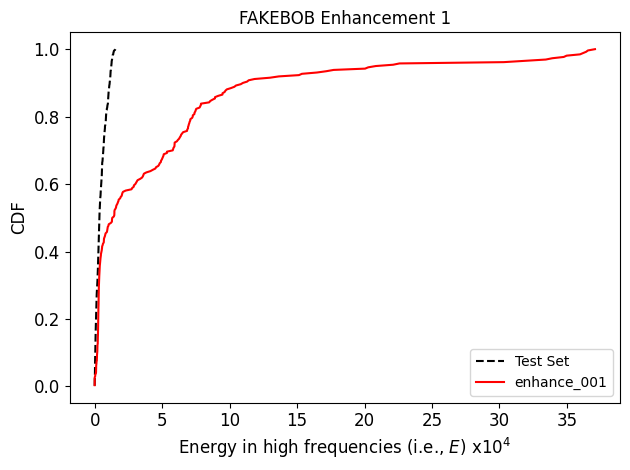

In [8]:
# Enhancement 1 (incorporating MEHFEST metric in the loss function)
enhance_1_files = os.listdir("output/enhance_1/")
enhance_1_data = {}
for x in enhance_1_files:
  with open(f"output/enhance_1/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    enhance_1_data[x.split(".pickle")[0]] = temp

# plot_cdf_adversarial_audio(original_data_5142["5142"], enhance_1_data, "FAKEBOB Enhancement 1")
plot_cdf_adversarial_audio(original_data["test-set"], enhance_1_data, "FAKEBOB Enhancement 1")

Size = 500, Max = 0.00015418203838635236, Min = 0.0, Mean =  0.00004719, STD =  0.00003913, D =  0.00016457
Size = 202, Max = 0.0007542598177678883, Min = 1.6142379536177032e-05, Mean =  0.00014881, STD =  0.00006583, D =  0.00034630
------------------------------------------
FNR for enhance_002: 65.84158415841584
------------------------------------------


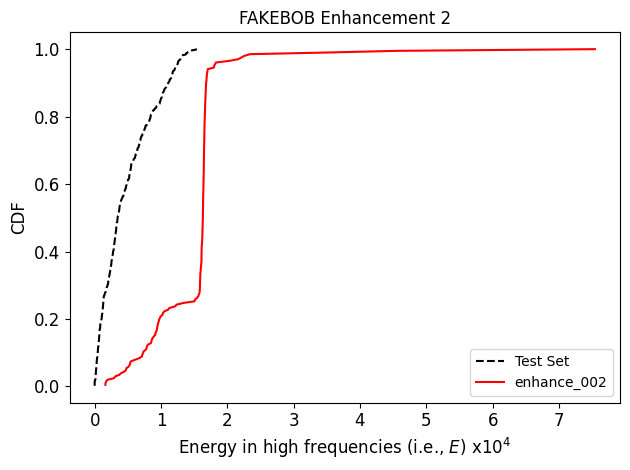

In [10]:
# Enhancement 2 (perturbing audio signals above a specified threshold)
enhance_2_files = os.listdir("output/enhance_2/")
enhance_2_data = {}
for x in enhance_2_files:
  with open(f"output/enhance_2/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    enhance_2_data[x.split(".pickle")[0]] = temp

# plot_cdf_adversarial_audio(original_data_5142["5142"], enhance_2_data, "FAKEBOB Enhancement 2")
plot_cdf_adversarial_audio(original_data["test-set"], enhance_2_data, "FAKEBOB Enhancement 2")